In [1]:
# Цели и задачи проект
# Проведение разведывательного анализа данных для разработки модели предсказания результатов
# госэкзамена по математике для каждого ученика школы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn import preprocessing

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_rows', 50)       # показывать больше строк
pd.set_option('display.max_columns', 50)    # показывать больше колонок

In [5]:
pd.options.mode.use_inf_as_na = True

In [6]:
# Количество первых анализируемых признаков
_n_ = 10

In [7]:
# функция получения данных распределения интервалов

def get_data(column):

    median = column.median()
    percent_quantile_25 = column.quantile(0.25)
    percent_quantile_75 = column.quantile(0.75)

    IQR = percent_quantile_75 - percent_quantile_25

    return median, IQR, median - 1.5*IQR, median + 1.5*IQR, percent_quantile_25, percent_quantile_75

In [8]:
stud_math = pd.read_csv('stud_math.csv')  # загрузка df
sdf = stud_math.copy()                   # создание рабочего df
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sdf)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [9]:
# Извлечение сведений о характеристиках данных

In [10]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [11]:
# Извлечение сведений о NaN значениях в данных

In [12]:
d = pd.DataFrame(sdf.isna().sum())
display(d.iloc[:, 0])

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
Name: 0, dtype: int64

In [13]:
# проверка достоверности выборки при ликвидации всех строк, содержащих NaN
# размер выработки уменьшается в 4 раза
# Вывод - предпочтительным является заполнение недостающих данных в датафрейме

test = sdf.copy()
test.dropna(axis=0, inplace=True)
display(len(test))

97

In [14]:
# Проверка и анализ номинативных признаков на уникальность, тестирование и преобразование

In [15]:
for col in sdf.columns:
    n = sdf[col].unique()
    print('Уникальных значений {} - {} тип {}'.format(col, n, n.dtype))

Уникальных значений school - ['GP' 'MS'] тип object
Уникальных значений sex - ['F' 'M'] тип object
Уникальных значений age - [18 17 15 16 19 22 20 21] тип int64
Уникальных значений address - ['U' nan 'R'] тип object
Уникальных значений famsize - [nan 'GT3' 'LE3'] тип object
Уникальных значений Pstatus - ['A' nan 'T'] тип object
Уникальных значений Medu - [ 4.  1.  3.  2. nan  0.] тип float64
Уникальных значений Fedu - [ 4.  1.  2.  3. 40. nan  0.] тип float64
Уникальных значений Mjob - ['at_home' 'health' 'other' 'services' 'teacher' nan] тип object
Уникальных значений Fjob - ['teacher' 'other' nan 'health' 'services' 'at_home'] тип object
Уникальных значений reason - ['course' 'other' 'home' 'reputation' nan] тип object
Уникальных значений guardian - ['mother' 'father' 'other' nan] тип object
Уникальных значений traveltime - [ 2.  1.  3. nan  4.] тип float64
Уникальных значений studytime - [ 2.  3.  1. nan  4.] тип float64
Уникальных значений failures - [ 0.  3. nan  2.  1.] тип float

In [16]:
# Тест значений категориальных признаков на соответствие установленным значениям и интервалам

sdf.Medu = sdf.Medu.apply(lambda x: x if np.isnan(
    x) else x if x in [0, 1, 2, 3, 4] else 4)
sdf.Fedu = sdf.Fedu.apply(lambda x: x if np.isnan(
    x) else x if x in [0, 1, 2, 3, 4] else 4)
sdf.famrel = sdf.famrel.apply(
    lambda x: x if np.isnan(x) else x if 1 <= x <= 5 else 5)
sdf.traveltime = sdf.traveltime.apply(
    lambda x: x if np.isnan(x) else x if x in [1, 2, 3, 4] else 4)
sdf.studytime = sdf.studytime.apply(
    lambda x: x if np.isnan(x) else x if x in [1, 2, 3, 4] else 4)
sdf.failures = sdf.failures.apply(
    lambda x: x if np.isnan(x) else x if 1 <= x <= 3 else 0)
sdf.freetime = sdf.freetime.apply(
    lambda x: x if np.isnan(x) else x if 1 <= x <= 5 else 5)
sdf.goout = sdf.goout.apply(
    lambda x: x if np.isnan(x) else x if 1 <= x <= 5 else 5)
sdf.health = sdf.health.apply(
    lambda x: x if np.isnan(x) else x if 1 <= x <= 5 else 5)

In [17]:
# Тест значений номинативных признаков на соответствие установленным значениям

sdf.school = sdf.school.apply(lambda x: x if x in ['GP', 'MS'] else np.nan)
sdf.sex = sdf.sex.apply(lambda x: x if x in ['F', 'M'] else np.nan)
sdf.address = sdf.address.apply(lambda x: x if x in ['U', 'R'] else np.nan)
sdf.famsize = sdf.famsize.apply(lambda x: x if x in ['LE3', 'GT3'] else np.nan)
sdf.Mjob = sdf.Mjob.apply(lambda x: x if x in [
                          'teacher', 'health', 'services', 'at_home', 'other'] else np.nan)
sdf.Fjob = sdf.Fjob.apply(lambda x: x if x in [
                          'teacher', 'health', 'services', 'at_home', 'other'] else np.nan)
sdf.reason = sdf.reason.apply(
    lambda x: x if x in ['home', 'reputation', 'course', 'other'] else np.nan)
sdf.guardian = sdf.guardian.apply(
    lambda x: x if x in ['mother', 'father', 'other'] else np.nan)

sdf.schoolsup = sdf.schoolsup.apply(
    lambda x: x if x in ['yes', 'no'] else np.nan)
sdf.famsup = sdf.famsup.apply(lambda x: x if x in ['yes', 'no'] else np.nan)
sdf.paid = sdf.paid.apply(lambda x: x if x in ['yes', 'no'] else np.nan)
sdf.activities = sdf.activities.apply(
    lambda x: x if x in ['yes', 'no'] else np.nan)
sdf.nursery = sdf.nursery.apply(lambda x: x if x in ['yes', 'no'] else np.nan)
sdf.higher = sdf.higher.apply(lambda x: x if x in ['yes', 'no'] else np.nan)
sdf.internet = sdf.internet.apply(
    lambda x: x if x in ['yes', 'no'] else np.nan)
sdf.romantic = sdf.romantic.apply(
    lambda x: x if x in ['yes', 'no'] else np.nan)

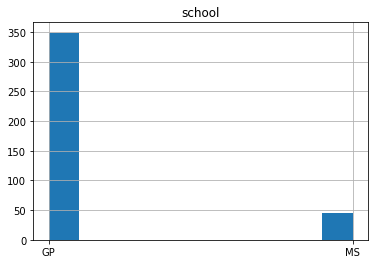

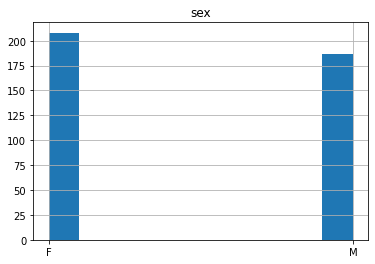

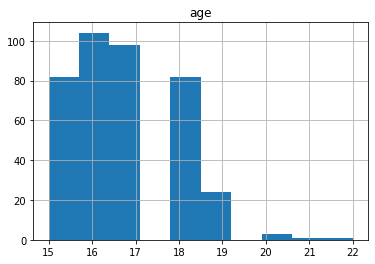

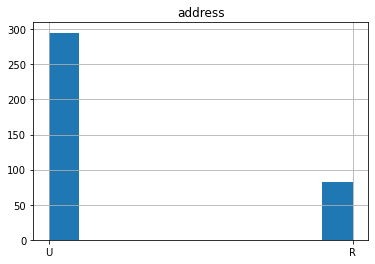

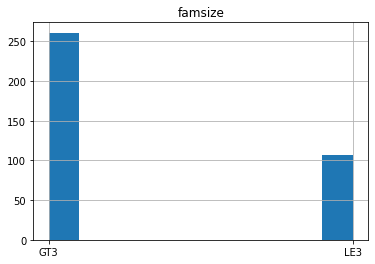

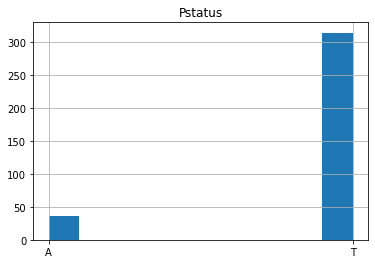

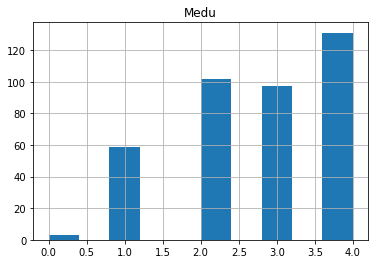

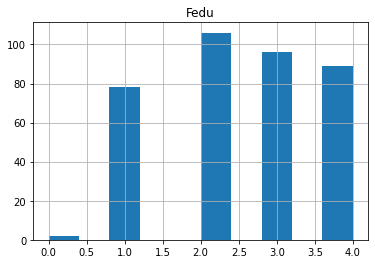

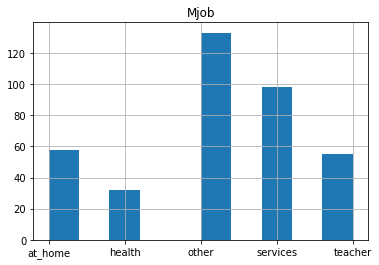

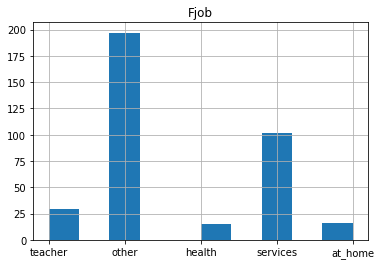

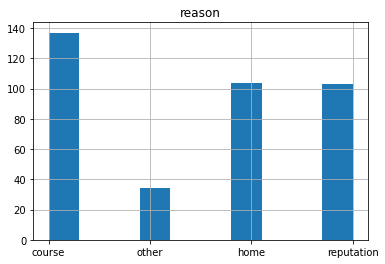

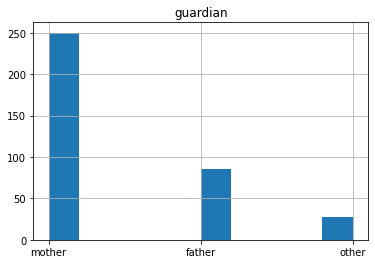

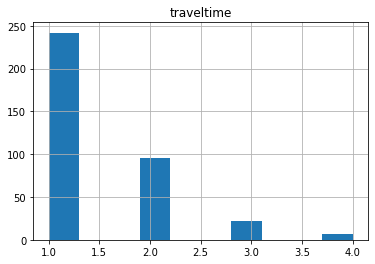

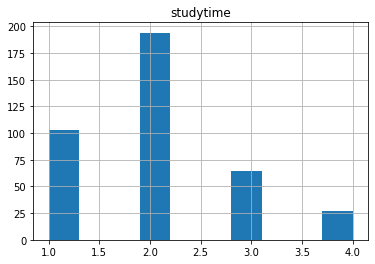

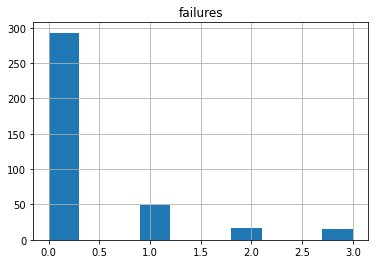

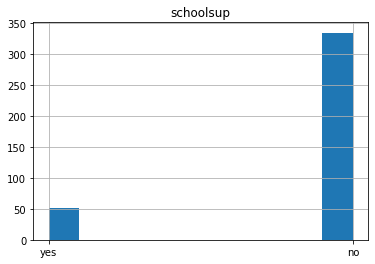

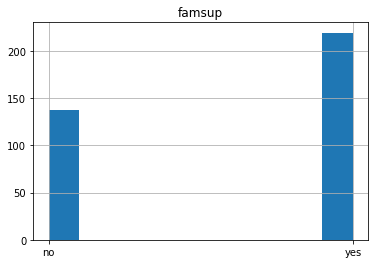

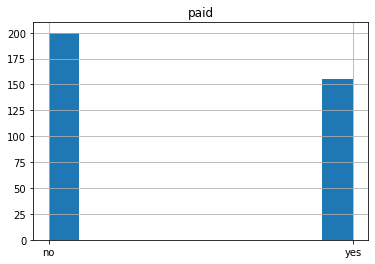

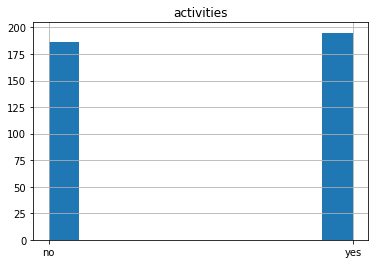

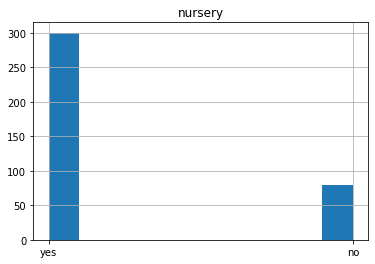

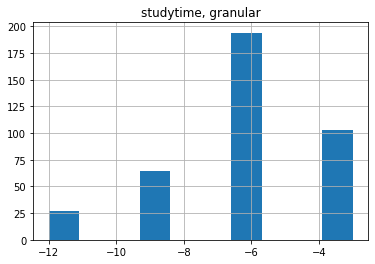

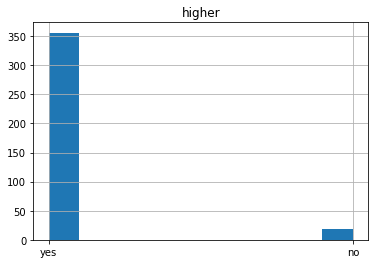

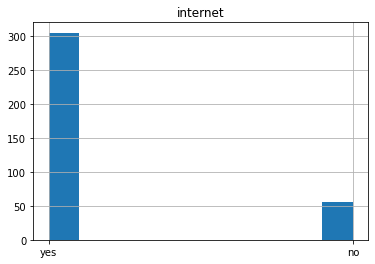

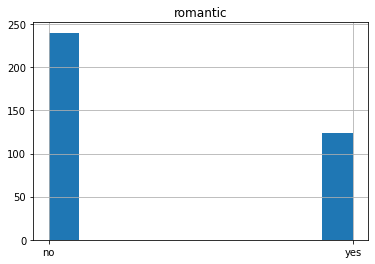

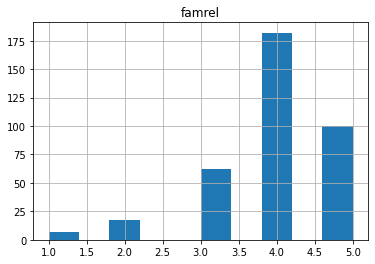

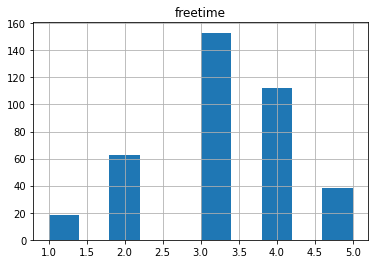

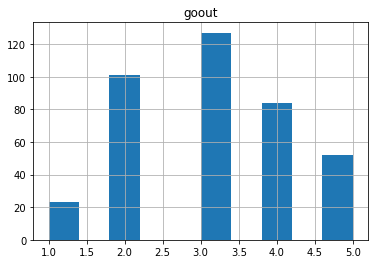

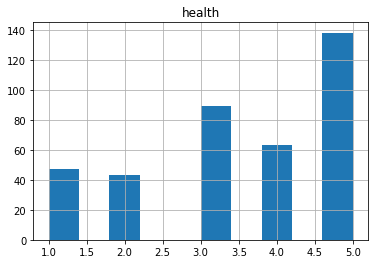

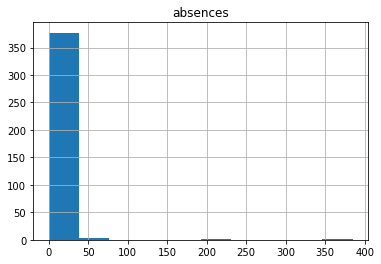

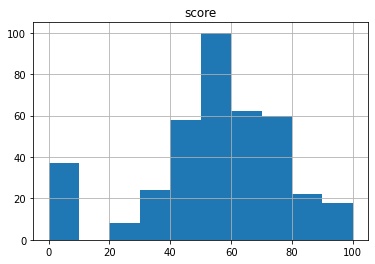

In [18]:
# Тест и анализ характеристик признаков на графиках

for col in sdf.columns:
    plt.figure()
    sdf[col].hist()
    plt.title(col)
    plt.show()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


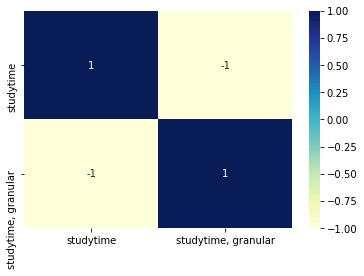

In [19]:
# Тестируем на корреляцию 'studytime' и 'studytime, granular'
# имеется обратная полная корреляция
# Имеет смысл исключить признак 'studytime, granular' из модели

display(sdf[['studytime', 'studytime, granular']].corr())
sns.heatmap(sdf[['studytime', 'studytime, granular']].corr(),
            annot=True, cmap="YlGnBu")

In [20]:
sdf[['studytime', 'studytime, granular']].corr()
sdf.drop(['studytime, granular'], inplace=True, axis=1)

In [21]:
# Иcключение столбцов значения которых предположительно не окажут влияния на оценку влияния на результат

sdf.drop(['Pstatus', 'higher'], inplace=True, axis=1)

In [22]:
# преобразование данных 'время в пути' в бинарное значение: 1 < 15 минут, 2 < свыше

sdf.traveltime = sdf.traveltime.apply(
    lambda x: x if np.isnan(x) else x if x == 1 else 2)

In [23]:
# преобразование данных количества внеучебных неудач: 0 или 1 (если в исходных данных их от 1 до 3)

sdf.failures = sdf.failures.apply(
    lambda x: x if np.isnan(x) else 1 if 1 <= x <= 3 else 0)

,goout,freetime
goout,1.000000,0.296437
freetime,0.296437,1.000000


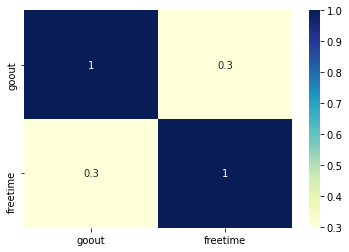

In [24]:
# по графикам есть визуальная связь параметров goout и freetime, проверяем их на корреляцию

display(sdf[['goout', 'freetime']].corr())
sns.heatmap(sdf[['goout', 'freetime']].corr(), annot=True, cmap="YlGnBu")

# Корреляция слабая - оставляем в таблице оба параметра

In [25]:
# удаление из датафрейма всех строк, где score являются NaN

sdf = sdf[~sdf['score'].isnull()]

In [26]:
# удаление из датафрейма всех строк по столбцам, где количество NaN меньше 5% от общего количества строк
# преобразование NaN в модальные данные или данные большинства, в зависимости от типа столбца
# для преобразований применяем функцию LabelEncoder().fit_transform()

for col in sdf.columns:

    if col not in ['age', 'absences', 'score']:

        if sdf[col].dtype == 'object':
            val = sdf[col].value_counts().idxmax()
        else:
            val = round(sdf[col].mode().iloc[0], 0)

        if sdf[col].isna().sum() != 0:
            if sdf[col].isna().sum() < len(sdf[col]) * 0.03:
                sdf = sdf[~sdf[col].isnull()]
            else:
                sdf[col].fillna(val, inplace=True)
        sdf[col] = preprocessing.LabelEncoder().fit_transform(sdf[col])

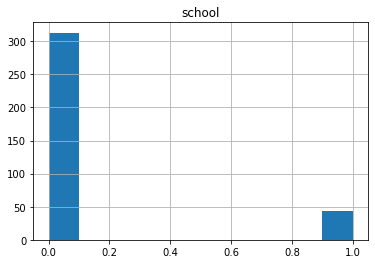

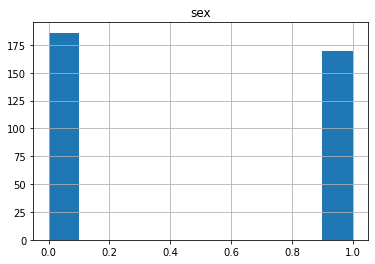

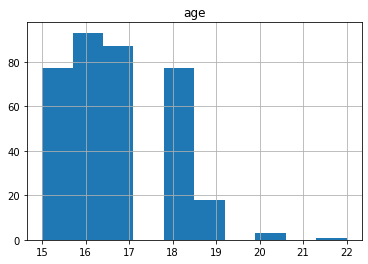

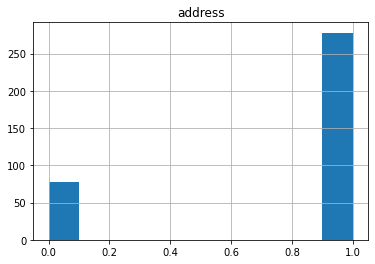

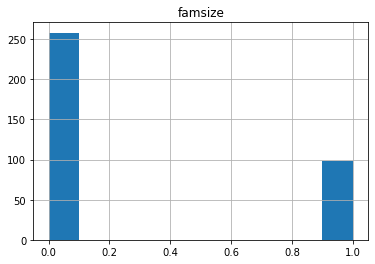

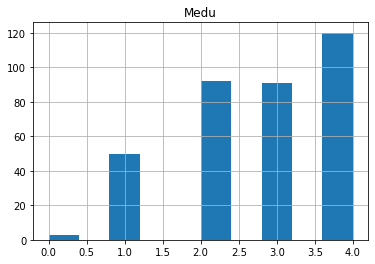

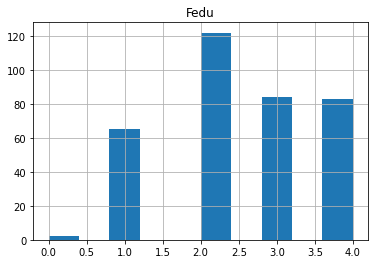

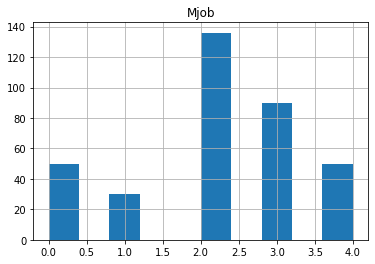

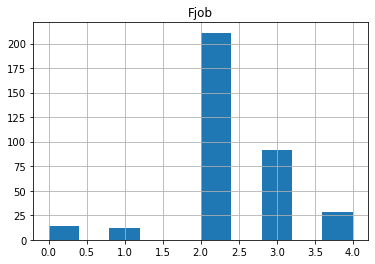

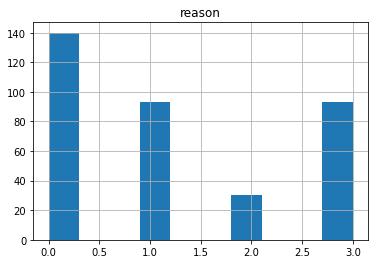

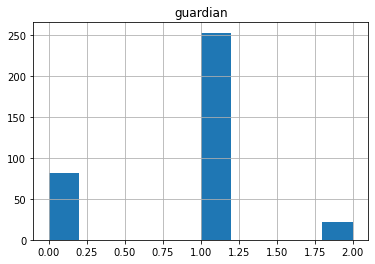

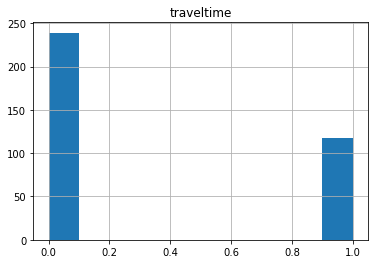

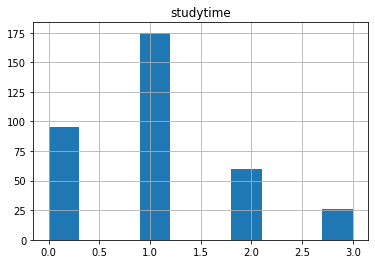

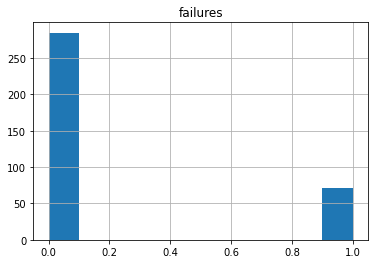

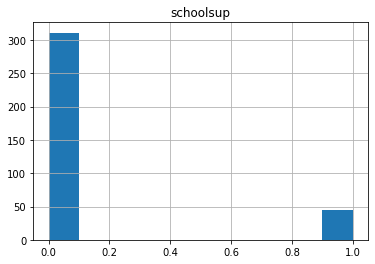

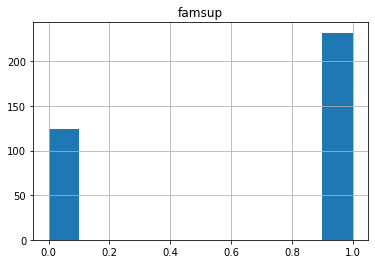

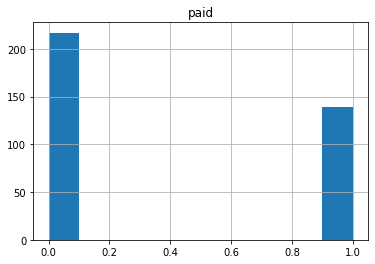

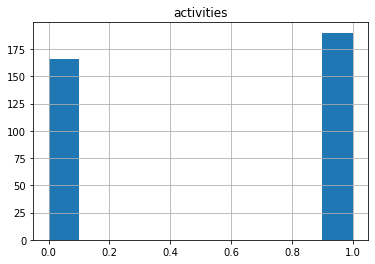

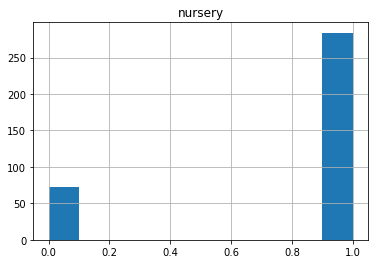

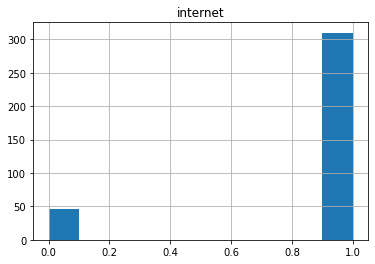

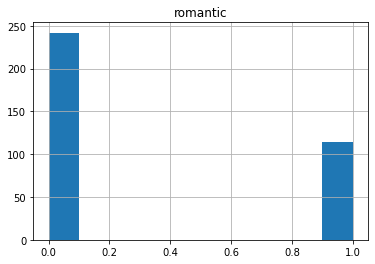

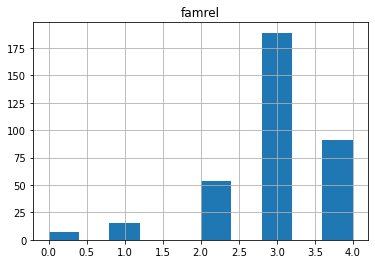

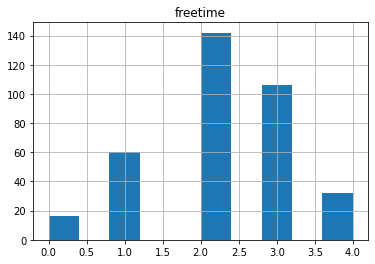

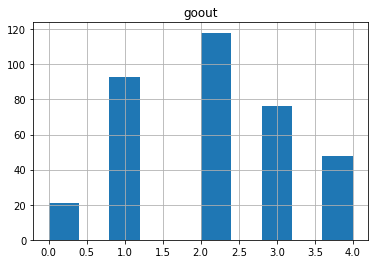

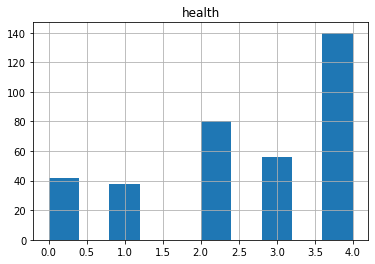

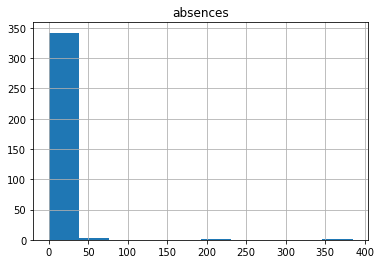

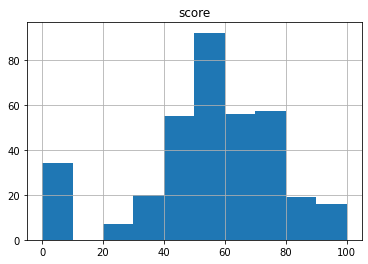

In [27]:
# Построение плот-диаграмм для каждой колонки

for col in sdf.columns:
    plt.figure()
    sdf[col].hist()
    plt.title(col)
    plt.show()

In [28]:
# исключение выбросов из признака 'absences'
# исключение выбросов для признака 'age' не осуществляем, возрастные данные свыше 20 вполне могут быть не выбросами

_, IQR, _low, _high, _, _ = get_data(sdf.absences)
sdf = sdf.loc[sdf.absences.between(_low, _high)]

count    323.00
mean      52.17
std       23.07
min        0.00
25%       42.50
50%       55.00
75%       70.00
max      100.00
Name: score, dtype: float64

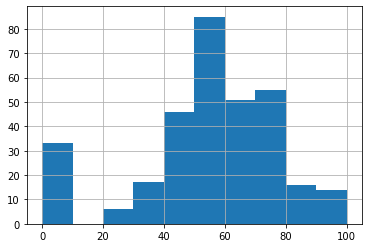

In [29]:
sdf.score.hist()
sdf.score.describe().round(2)

In [30]:
# исключение выбросов из score

_, IQR, _low, _high, _, _ = get_data(sdf.score)
sdf = sdf.loc[sdf.score.between(_low, _high)]

count    289.00
mean      57.96
std       15.55
min       25.00
25%       50.00
50%       55.00
75%       70.00
max       95.00
Name: score, dtype: float64

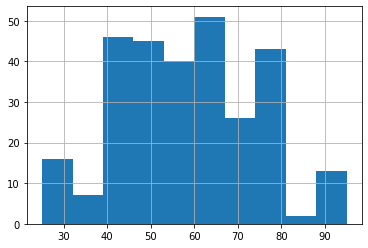

In [31]:
sdf.score.hist()
sdf.score.describe().round(2)

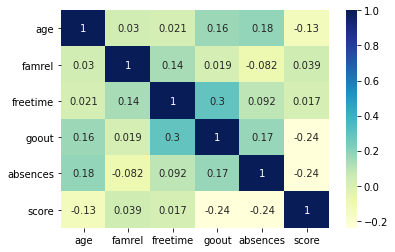

In [32]:
# визуализация матрицы корреляции числовых значений со score
# 'Score' находится в слабой корреляции с признаками 'age','goout','absences' - указанные признаки будут оставлены в модели

sns.heatmap(sdf[['age', 'famrel', 'freetime', 'goout',
                 'absences', 'score']].corr(), annot=True, cmap="YlGnBu")

count    289.00
mean      57.96
std       15.55
min       25.00
25%       50.00
50%       55.00
75%       70.00
max       95.00
Name: score, dtype: float64

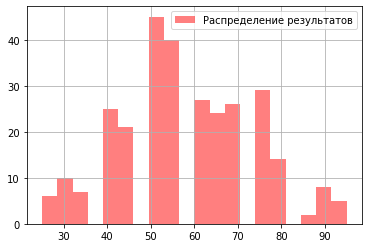

In [33]:
# Визуализация распределения результатов экзамена

sdf.score.hist(alpha=0.5, bins=20, color='red',
               label='Распределение результатов')
plt.legend()
sdf.score.describe().round(2)

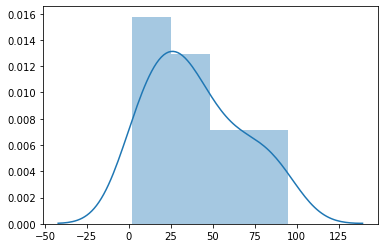

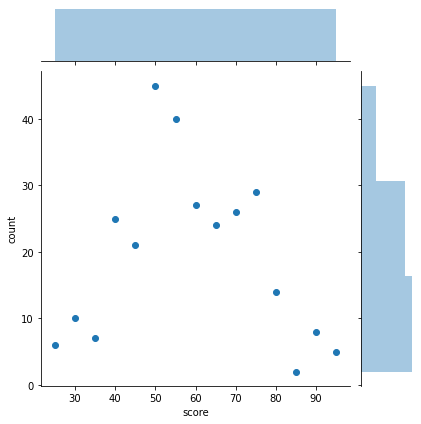

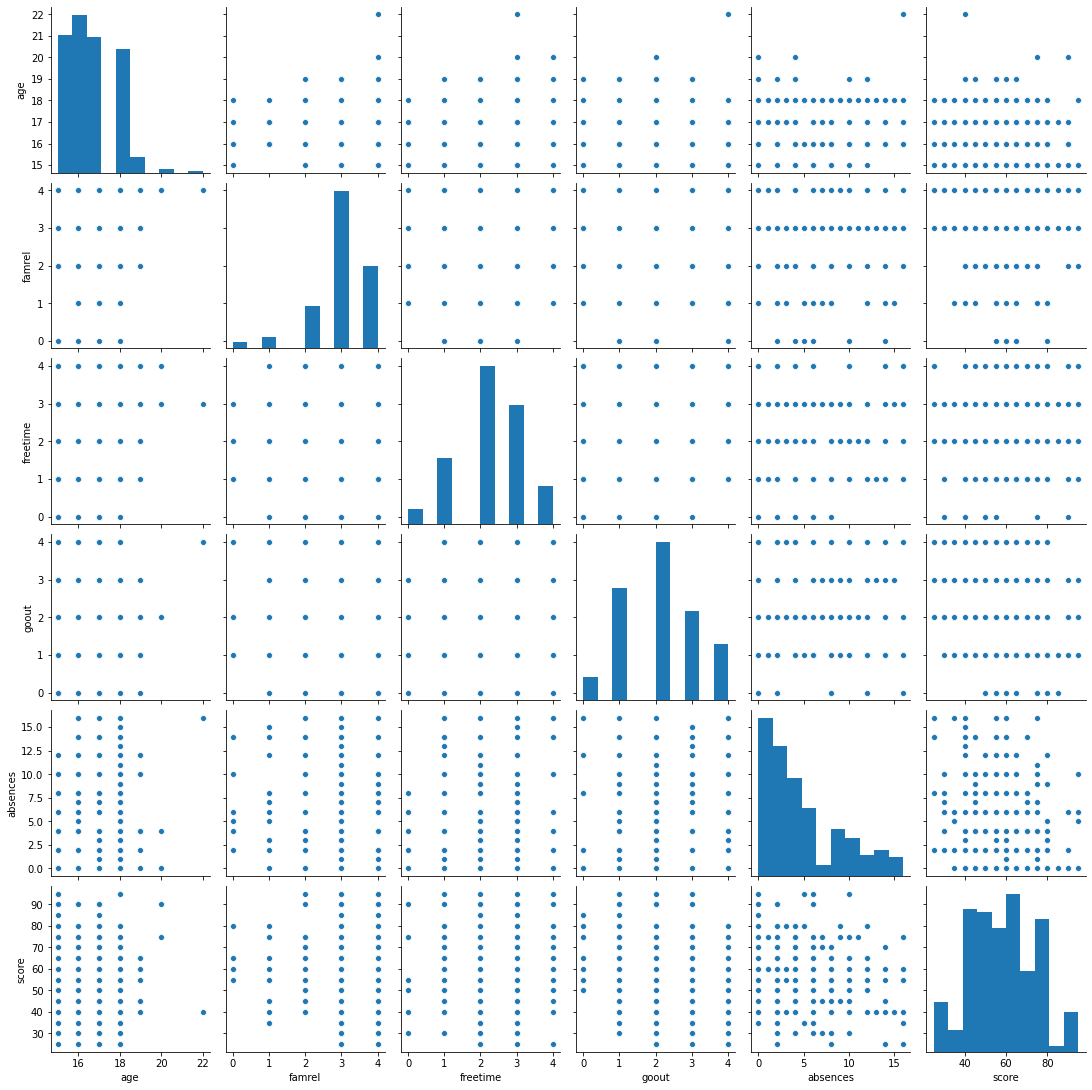

In [34]:
_val = pd.DataFrame(sdf.score.value_counts())
_val.reset_index(inplace=True)
_val.columns = ['score', 'count']
_val.sort_values(by='score')

sns.distplot(_val)
sns.jointplot(x='score', y='count', data=_val)
sns.pairplot(sdf[['age', 'famrel', 'freetime', 'goout', 'absences', 'score']])

In [35]:
# Функция построения boxplot по признакам

def get_boxplot(col):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='score',
                data=sdf.loc[sdf.loc[:, col].isin(
                    sdf.loc[:, col].value_counts().index[:_n_])],
                ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + col)
    plt.show()

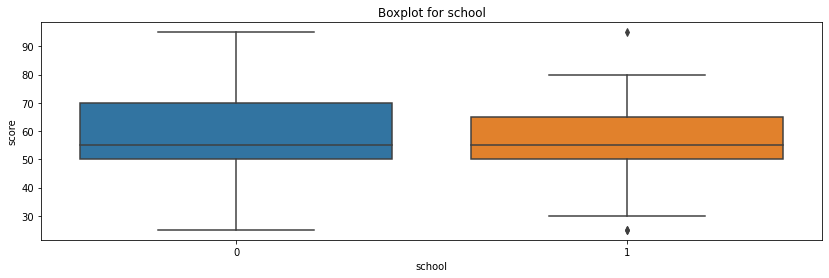

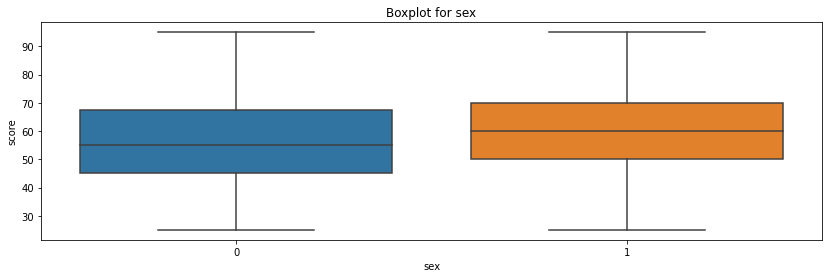

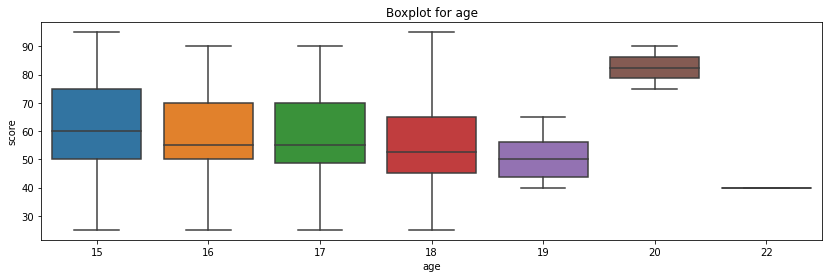

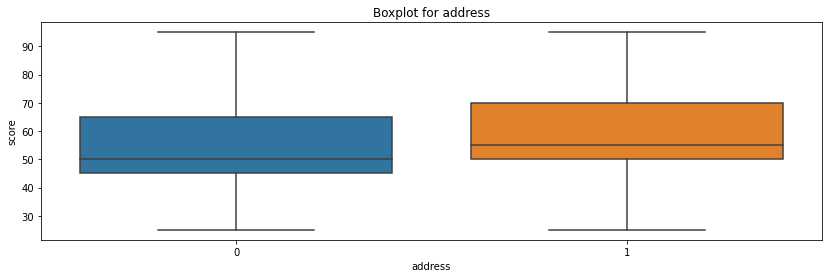

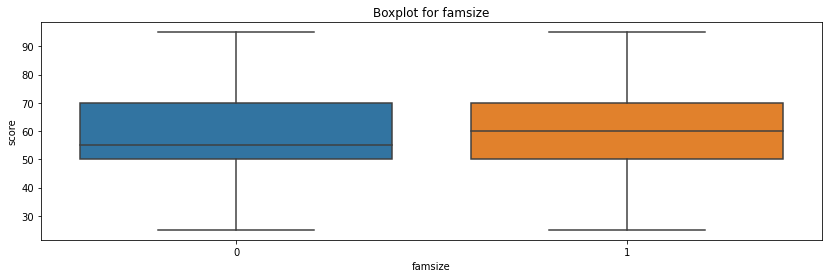

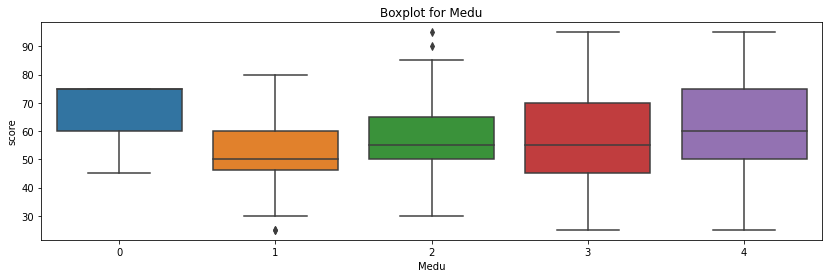

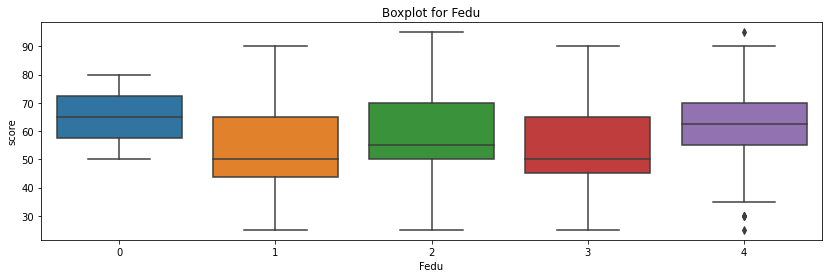

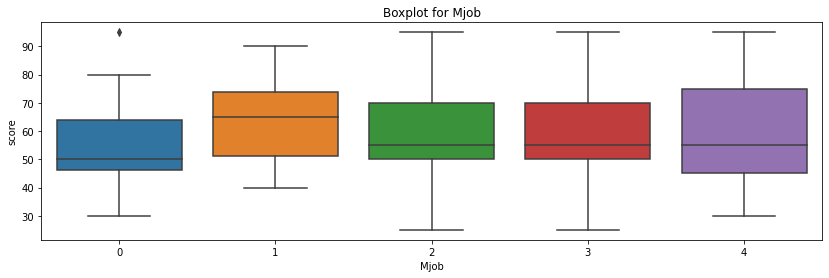

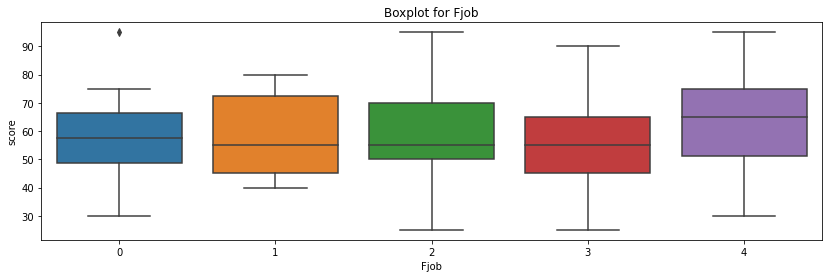

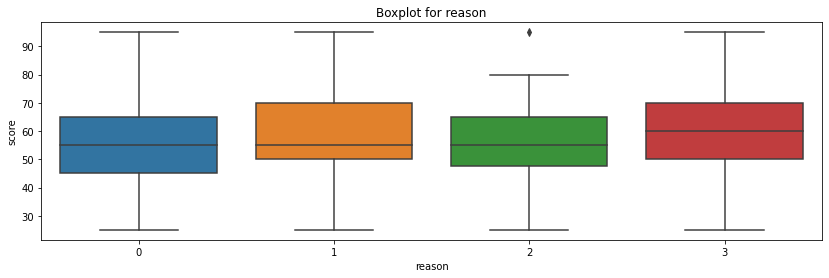

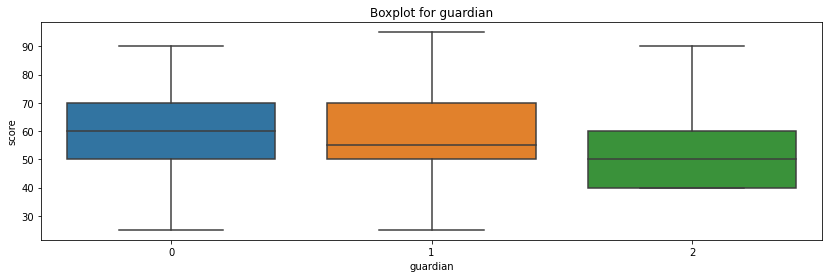

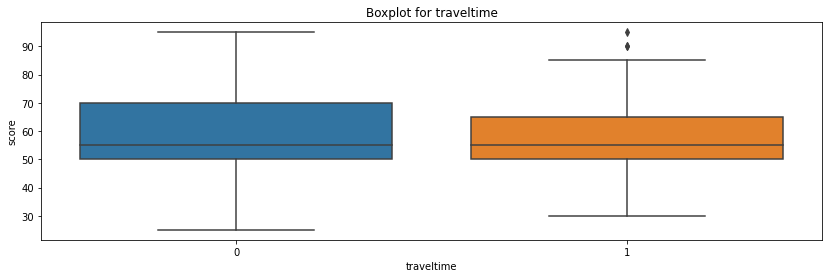

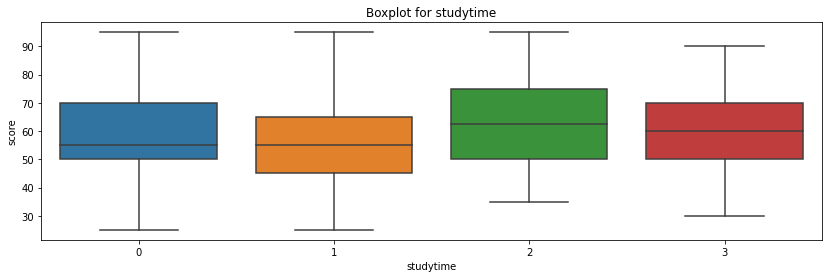

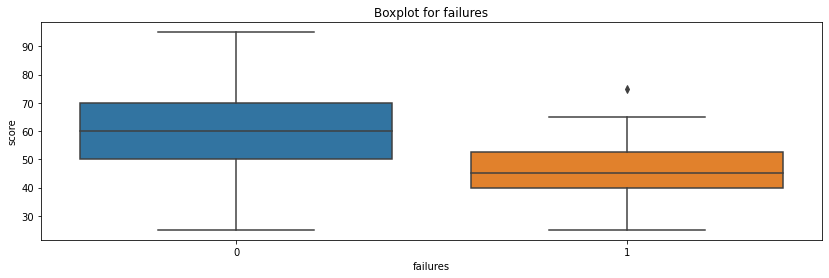

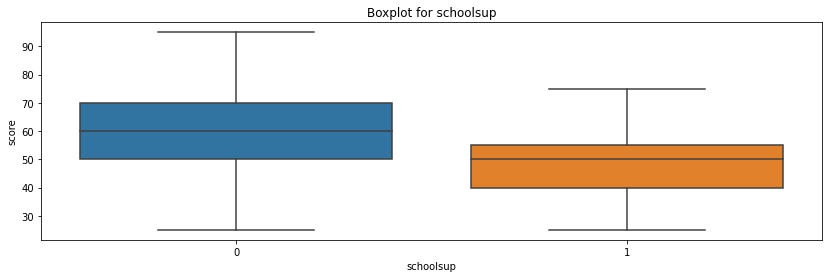

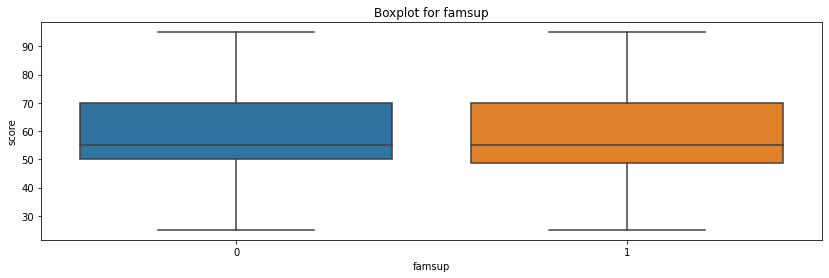

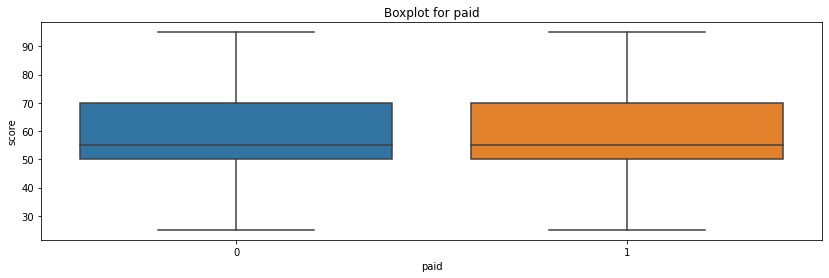

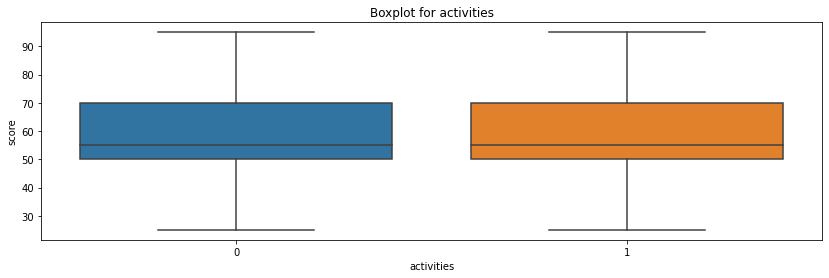

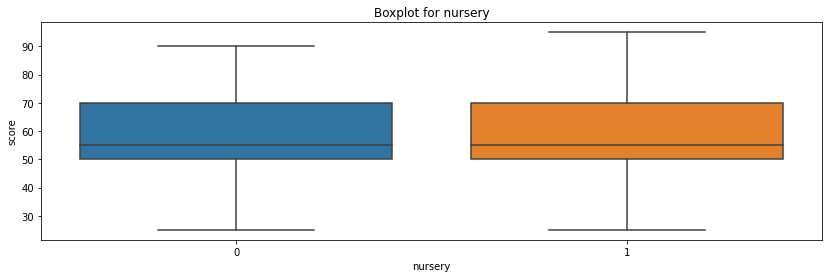

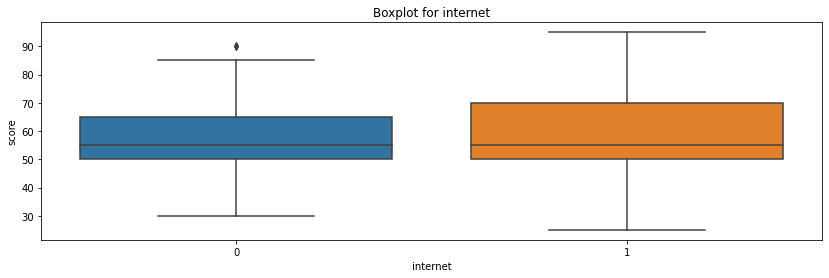

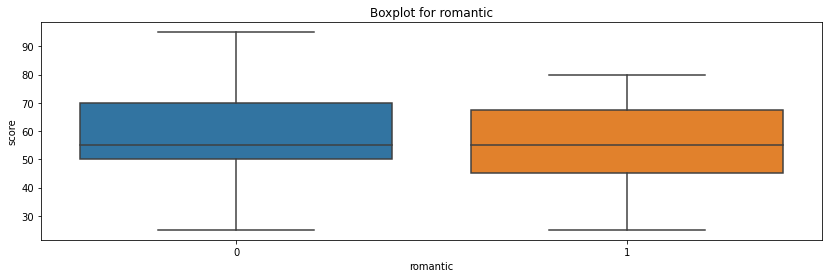

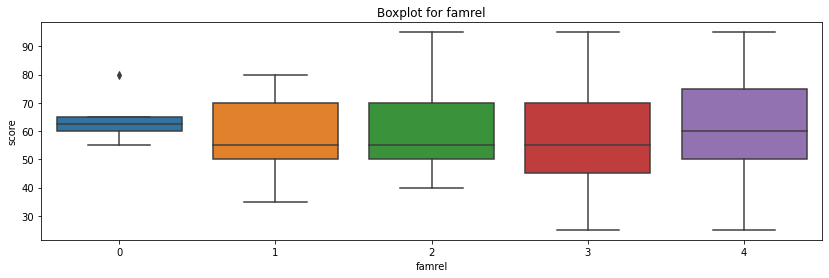

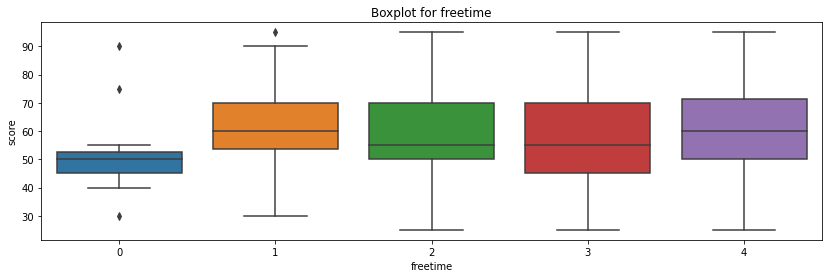

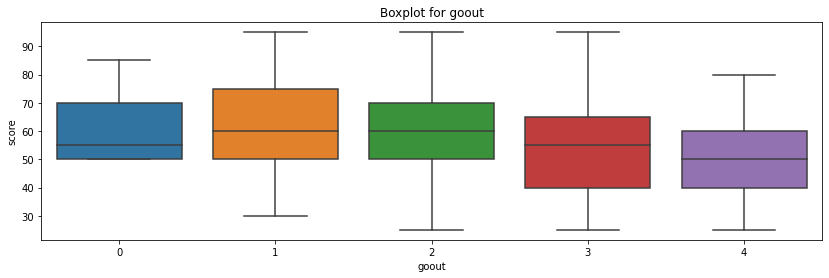

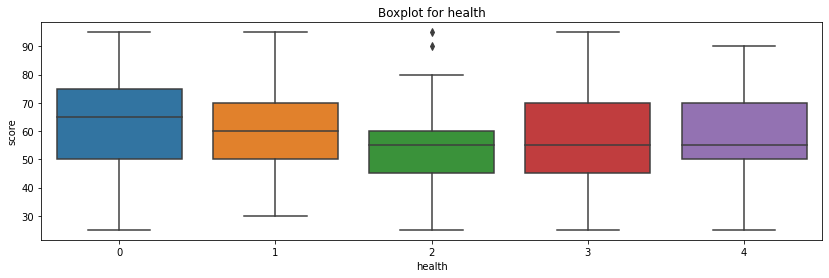

In [36]:
# оценка различий распределения score в зависимости от значения номинативных признаков
# famsize, famsup, paid, activities, nursery, internet влияния на score практически не оказывают

for col in sdf.columns:
    if col in ['absences', 'score']:
        continue
    get_boxplot(col)

In [37]:
# Функция выявления статистической разницы в распределении оценок по номинативным признакам

def get_stat_dif(col):
    cols = sdf.loc[:, col].value_counts().index[:_n_]
    comb_all = list(combinations(cols, 2))
    for comb in comb_all:
        if ttest_ind(sdf.loc[sdf.loc[:, col] == comb[0], 'score'],
                     sdf.loc[sdf.loc[:, col] == comb[1], 'score']).pvalue <= 0.05/len(comb_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', col)
            break

In [38]:
# Проверка на наличие статистической разницы в распределении оценок по номинативным признакам с помощью теста Стьюдента

# Вывод - из номинативных признаков для модели оставляем 'sex', 'address', 'Medu', 'studytime', 'failures',
# 'schoolsup','goout'

for col in sdf.columns:
    if col in ['absences', 'score']:
        continue
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


In [39]:
# Представление разведывательной модели

# Итоговый вывод - из номинативных признаков для модели оставляем
#   'sex', 'age', 'address', 'Medu', 'studytime', 'failures',
#   'schoolsup', 'goout', 'absences', 'score'

stud_math = sdf[['sex', 'age', 'address', 'Medu', 'studytime', 'failures',
                 'schoolsup', 'goout', 'absences', 'score']]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(stud_math)

,sex,age,address,Medu,studytime,failures,schoolsup,goout,absences,score
0,0,18,1,4,1,0,1,3,6.0,30.0
1,0,17,1,1,1,0,0,2,4.0,30.0
2,0,15,1,1,1,1,1,1,10.0,50.0
3,0,15,1,4,2,0,0,1,2.0,75.0
4,0,16,1,3,1,0,0,1,4.0,50.0
5,1,16,1,4,1,0,0,1,10.0,75.0
6,1,16,1,2,1,0,0,3,0.0,55.0
7,0,17,1,4,1,0,1,3,6.0,30.0
8,1,15,1,3,1,0,0,1,0.0,95.0
9,1,15,1,3,1,0,0,0,0.0,75.0
